<a href="https://colab.research.google.com/github/veritaem/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Copy_of_Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [3]:
df.isnull().sum().sum()

0

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [4]:
y = df['price']
X = df.drop(['price'], axis = 1)
X

,make,body,mileage,engV,engType,registration,year,drive
0,23,0,68,2.50,1,1,2010,1
1,50,3,173,1.80,1,1,2011,2
2,50,2,135,5.50,3,1,2008,2
3,50,5,162,1.80,0,1,2012,0
4,55,0,83,2.00,3,1,2013,1
5,30,3,199,2.00,3,1,2003,0
6,59,4,185,1.50,0,1,2011,0
7,50,3,146,1.80,1,1,2012,2
8,50,3,125,2.20,0,1,2010,2
9,55,0,0,1.20,3,1,2016,0


In [5]:
y

0        15500.000
1        20500.000
2        35000.000
3        17800.000
4        16600.000
5         6500.000
6        10500.000
7        21500.000
8        22700.000
9        20447.154
10       20400.000
11       22500.000
12       21500.000
13       19999.000
14      129222.000
15       99999.000
16       16600.000
17       73900.000
18       26033.553
19      104999.000
20       66500.000
21       65099.000
22       23900.000
23       69999.000
24       66200.000
25       63000.000
26      105999.000
27       10700.000
28        2600.000
29       13700.000
           ...    
8465     20000.000
8466      1200.000
8467     12900.000
8468     34600.000
8469      9899.000
8470     44800.000
8471     10450.000
8472      4500.000
8473      2750.000
8474      2100.000
8475      2499.000
8476     12700.000
8477      9900.000
8478      5600.000
8479     21900.000
8480      7900.000
8481      5200.000
8482      3250.000
8483      6100.000
8484      9300.000
8485      8900.000
8486     139

## 1.2 Split the data into test and train datasets using train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state= 43)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

      make  body  mileage  engV  engType  registration  year  drive
3498    77     4      243   1.9        0             0  1999      0
5058    76     3       87   1.6        3             1  2002      2
3010     4     0      112   3.2        3             1  2010      1
5237    12     3      162   1.6        1             1  2008      0
3930     4     4      320   2.5        0             0  2002      1
784     69     0      108   2.0        0             1  2007      1
5769    77     2      280   1.9        0             0  1997      0
5880    77     3      110   1.8        3             1  2011      0
4221    52     0      269   3.2        0             1  2002      1
1386    67     3      160   1.8        1             1  2003      0
905     17     3      153   1.5        1             1  2007      0
598     33     0      138   2.0        1             1  2007      0
4197    77     5      325   2.5        0             1  2001      0
3677    23     1       42   1.0        3        

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [7]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [8]:
print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [  -36.32609086 -1923.78521191   -41.30002047   391.02673879
  -865.32898885  4408.48931507  1187.14705824  8625.87310789]

 Intercept:  -2362306.1132807015


## 1.5 Use the test data to make predictions

In [0]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [10]:
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

RMSE is 19568.526228357307
R^2 is 0.2953523545175982


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

Because the coefficient is a positive 1187.15, this means that as the year increases by 1 with all other variables holding steady, you should expect the price of the car to increase by somewhere around 1187.15 hryvnia, at least without any other additional transformations done to  this data.  So what we have so far is:

$
\begin{align}Price = -36.3(make) - 1923.78(body) - 41.30(mileage) + 391.02(engineV) - 865.32(engine type) + 4408.49(registration) +1187.15(year) +  8625.87(drive)
\end{align}$

## 1.8 How should we interpret the Root-Mean-Square Error?

a root mean square error is what happens when you square all the residuals to and then square root that positive number, and gives you the spread of the y values around the prediction values.  In this case that spread is fairly substantial, which may mean outliers, it may mean our data isnt too good, that there are huge inconsistencies in the market, or that my calculations are incorrect(the last one I do not think is the case however).

## 1.9 How should we interpret the $R^2$?

An $R^2$ variable is the amount of varaince in our target that can be predicted from our X values.  In this case the $R^2$ is only .2953,  which means only about 30% of the price of the vehicles can be determined from looking at these factors together.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [47]:
df['ln_Y'] = np.log(df['price'])
ln_Y = df['ln_Y']
ln_Y

0        9.648595
1        9.928180
2       10.463103
3        9.786954
4        9.717158
5        8.779557
6        9.259131
7        9.975808
8       10.030120
9        9.925599
10       9.923290
11      10.021271
12       9.975808
13       9.903438
14      11.769287
15      11.512915
16       9.717158
17      11.210468
18      10.167141
19      11.561706
20      11.104957
21      11.083664
22      10.081634
23      11.156236
24      11.100436
25      11.050890
26      11.571185
27       9.277999
28       7.863267
29       9.525151
30       9.104869
31       9.840388
32      10.518673
33      12.206073
34       8.255828
35       9.923290
36       7.549609
37      11.512915
38      11.170421
39      11.058795
40      11.000432
41       9.126959
42       9.915510
43       9.581214
44       9.104869
45       8.202482
46       9.392662
47       9.934690
48      10.915088
49       9.798127
50       9.985068
51       7.783224
52       7.762171
53       9.830917
54      11.561706
55      12

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

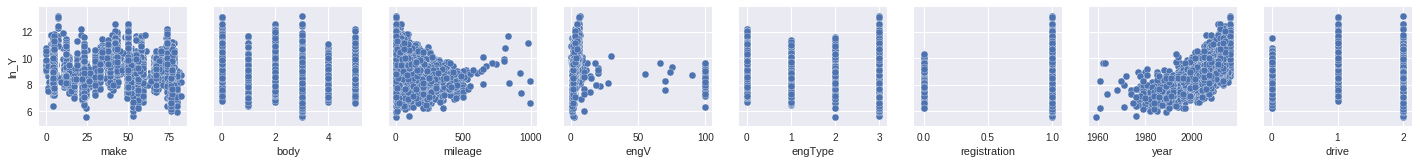

In [12]:
Xcol = df.columns.drop(['price', 'ln_Y'])
sns.pairplot(data = df, y_vars = 'ln_Y', x_vars = Xcol )

## 2.3 If appropriate, create any polynomial features. 

Year looks like It could benefit from being polynomial-ized?(polynomialed? polyed?) and I might as well try mileage and make so see if they get anything cool also, because they seem like they have a few curves and Id like to see what happens, and if they dont behave I can always drop them.  

In [0]:
df['year_cu'] = df['year']**3
df['make_cu'] = df['make']**3
df['mile_cu'] = df['mileage']**3

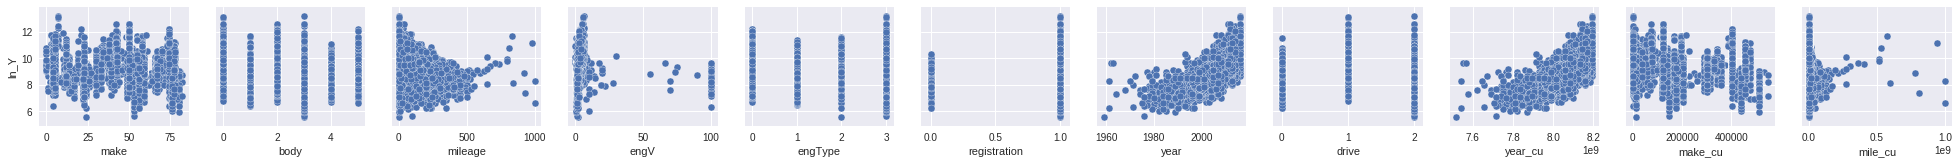

In [14]:
col = df.columns.drop(['price', 'ln_Y'])
sns.pairplot(data = df, y_vars = 'ln_Y', x_vars = col )

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [15]:
coldf = df.drop(['price', 'ln_Y'], axis = 1)
coldf

,make,body,mileage,engV,engType,registration,year,drive,year_cu,make_cu,mile_cu
0,23,0,68,2.50,1,1,2010,1,8120601000,12167,314432
1,50,3,173,1.80,1,1,2011,2,8132727331,125000,5177717
2,50,2,135,5.50,3,1,2008,2,8096384512,125000,2460375
3,50,5,162,1.80,0,1,2012,0,8144865728,125000,4251528
4,55,0,83,2.00,3,1,2013,1,8157016197,166375,571787
5,30,3,199,2.00,3,1,2003,0,8036054027,27000,7880599
6,59,4,185,1.50,0,1,2011,0,8132727331,205379,6331625
7,50,3,146,1.80,1,1,2012,2,8144865728,125000,3112136
8,50,3,125,2.20,0,1,2010,2,8120601000,125000,1953125
9,55,0,0,1.20,3,1,2016,0,8193540096,166375,0


In [0]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(coldf, ln_Y, test_size=.5, random_state= 1338)

In [17]:
model2 = LinearRegression()
model2.fit(X_train2, Y_train2)

print("Coefficient: \n", model2.coef_)
print("\n Intercept: ", model2.intercept_)

Coefficient: 
 [ 5.77369031e-04 -9.25902395e-02  7.47619274e-04  6.88482937e-03
 -4.87503783e-02  6.53940786e-01 -3.09082428e+00  3.71082684e-01
  2.65522520e-07 -2.99429516e-07 -3.50531083e-10]

 Intercept:  4065.2669722365117


In [18]:
y_test_predict2 = model2.predict(X_test2)

MSE2 = mean_squared_error(Y_test2, y_test_predict2)

RMSE2 = (np.sqrt(mean_squared_error(Y_test2, y_test_predict2)))

print('RMSE is {}'.format(RMSE2))

R2D2 = r2_score(Y_test2, y_test_predict2)

print('R^2 is {}'.format(R2D2))

RMSE is 0.5459623433959888
R^2 is 0.6829213844544986


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The coefficient of year and year cubed are -3.09 and  .000000265 respectively, which means that after using the log of price to normalize it a bit, we see that year actually doesnt have a massive impact on price, not nearly as much as was in the first model.  This could mean that certain years have particularly valuable cars or that 

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

The Gradient Descent seeks to find the minimum or maximum of a function quickly by taking iterative jumps based on the slope of the line and it seeks to minimize the cost of hypotheses by trying to minimize the sum of the squared residuals.

## 3.2 What is the "Learning Rate" and what is its function?

The learning rate represents your initial steps you take along the slope of a line, and the function of these steps is to give you information that updates the rate by taking the slope at each point of contact and then recalculating its step length needs.  

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.


In [21]:
coldf = sm.add_constant(coldf)

model3 = sm.OLS(ln_Y, coldf).fit(cov_type='HC3')
predictions = model3.predict(coldf) 

print_model3 = model3.summary()
print(print_model3)

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1531.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:22:02   Log-Likelihood:                -6952.3
No. Observations:                8495   AIC:                         1.393e+04
Df Residuals:                    8483   BIC:                         1.401e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4449.7595    440.215     10.108   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [22]:
print(coldf.columns, '\n\n')

vif = [variance_inflation_factor(coldf.values, x) for x in range(coldf.shape[1])]
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'year_cu', 'make_cu', 'mile_cu'],
      dtype='object') 


[0.0, 6.457268787243616, 1.173368159020488, 3.398370896336673, 1.0106306480142693, 1.1737841010271468, 1.113210509414944, 39001.288338486214, 1.1421116255480124, 39160.307607516166, 6.457637708153859, 1.8565989003755723]


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


This says that Year and Year cubed are highly multicollinear, but also warns that some division by 0 happened somewhere so I wonder if these two have it?

In [25]:
coldf.year.min()

1959

Ok...maybe not.  Wonder what would happen if i dropped these?


In [26]:
coldf2 = coldf.drop(['year', 'year_cu'], axis = 1)
model4 = sm.OLS(ln_Y, coldf2).fit(cov_type='HC3')
predictions = model4.predict(coldf2) 

print_model4 = model4.summary()
print(print_model4)

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     594.1
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:34:33   Log-Likelihood:                -9860.2
No. Observations:                8495   AIC:                         1.974e+04
Df Residuals:                    8485   BIC:                         1.981e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.3005      0.046    203.801   

In [27]:
print(coldf2.columns, '\n\n')

vif2 = [variance_inflation_factor(coldf2.values, x) for x in range(coldf2.shape[1])]
print(vif2)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration', 'drive', 'make_cu', 'mile_cu'], dtype='object') 


[34.382939260871666, 6.442172682396696, 1.1698416531079434, 1.9176293112359413, 1.0094903879366126, 1.0937411231070897, 1.0917459018312716, 1.0930897764092742, 6.402280353151538, 1.6447068150195074]


Ok so I lost the weird numerical issues which im pretty sure were tied to the polynomial column 'year_cu', but taking these both out hurt skew, kurtosis, and the jarque-bera number, I think I should leave in the year and omit the 'year_cu'.

In [29]:
coldf2 = coldf.drop(['year_cu'], axis = 1)
model4 = sm.OLS(ln_Y, coldf2).fit(cov_type='HC3')
predictions = model4.predict(coldf2) 

print_model4 = model4.summary()
print(print_model4)

print('\n\n\n', coldf2.columns, '\n\n')

vif2 = [variance_inflation_factor(coldf2.values, x) for x in range(coldf2.shape[1])]
print(vif2)

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1324.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:38:25   Log-Likelihood:                -7156.8
No. Observations:                8495   AIC:                         1.434e+04
Df Residuals:                    8484   BIC:                         1.441e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -180.1017      3.499    -51.479   

Ok so It got a little better than without either, but not as good as including both, however make seems highly colinear with year, looking at the p values.  

In [54]:
coldf2 = coldf.drop(['make', 'year_cu', 'mile_cu'], axis = 1)
model4 = sm.OLS(ln_Y, coldf2).fit(cov_type='HC3')
predictions = model4.predict(coldf2) 

print_model4 = model4.summary()
print(print_model4)

print('\n\n\n', coldf2.columns, '\n\n')

vif2 = [variance_inflation_factor(coldf2.values, x) for x in range(coldf2.shape[1])]
print(vif2)

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1635.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:16:30   Log-Likelihood:                -7161.8
No. Observations:                8495   AIC:                         1.434e+04
Df Residuals:                    8486   BIC:                         1.441e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.2913      3.450    -52.541   

Omnibus:                      212.916 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Durbin-Watson:                   1.922<br>
Prob(Omnibus):                  0.000 &nbsp;&nbsp;&nbsp;&nbsp;
Jarque-Bera (JB):              504.137<br>
Skew:                          -0.047 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Prob(JB):                    3.37e-110<br>
Kurtosis:                       4.190 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Cond. No.                     3.07e+14

comparing the one with dropped values from the original, we can see the biggest leap being the jarqu-bera measurments, however both are 0 or near to it, which means that the errors are normally distributed, more or less.  This means that out regression is a pretty good fit for this data, woohoo!
